# Hyper-parameter Optimization(HPO) Exercise


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-white')

In [4]:
# Carseats Sales Prediction dataset
df3 = pd.read_csv('Data/Carseats.csv').drop('Unnamed: 0', axis=1)

In [200]:
df3

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [201]:
df3['High'] = df3.Sales.map(lambda x: 1 if x>8 else 0)
df3.ShelveLoc = pd.factorize(df3.ShelveLoc)[0]

df3.Urban = df3.Urban.map({'No':0, 'Yes':1})
df3.US = df3.US.map({'No':0, 'Yes':1})
X = df3.drop(['Sales', 'High'], axis=1)
y = df3.High

X.describe()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,124.975000,68.657500,6.635000,264.840000,115.795000,1.307500,53.322500,13.900000,0.705000,0.645000
std,15.334512,27.986037,6.650364,147.376436,23.676664,0.833475,16.200297,2.620528,0.456614,0.479113
min,77.000000,21.000000,0.000000,10.000000,24.000000,0.000000,25.000000,10.000000,0.000000,0.000000
25%,115.000000,42.750000,0.000000,139.000000,100.000000,1.000000,39.750000,12.000000,0.000000,0.000000
50%,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000
75%,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000
max,175.000000,120.000000,29.000000,509.000000,191.000000,2.000000,80.000000,18.000000,1.000000,1.000000


In [202]:
print(y.values)

[1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 1 1
 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1
 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1
 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1
 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1
 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0
 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0
 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 1
 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1]


### Task1: Grid search CV

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report



In [203]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [90]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

In [91]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [92]:
print(clf.feature_importances_)

[0.019801   0.04881228 0.15577771 0.03903196 0.28630437 0.24510819
 0.15505742 0.02311008 0.00155752 0.02543946]


In [93]:
pred = clf.predict(X_test)

In [94]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.64      0.97      0.77        65
           1       0.90      0.35      0.50        55

   micro avg       0.68      0.68      0.68       120
   macro avg       0.77      0.66      0.63       120
weighted avg       0.76      0.68      0.65       120



In [95]:
cm = pd.DataFrame(confusion_matrix(y_test, pred).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,63,36
Yes,2,19


In [96]:
from sklearn.model_selection import GridSearchCV


In [138]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4,10]
}

In [139]:
CV_rfc  = GridSearchCV(clf,param_grid , cv=5)
CV_rfc.fit(X_train, y_train)

C:\Users\DS\Anaconda3\envs\ds2\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 200], 'max_depth': [4, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [140]:
print(CV_rfc.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


In [141]:
CV_rfc.best_params_

{'max_depth': 10, 'n_estimators': 200}

In [142]:
bestEstimator = CV_rfc.best_estimator_

In [143]:
bestEstimator.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [144]:
predBest = bestEstimator.predict(X_test)

In [145]:
print(classification_report(y_test,predBest))

              precision    recall  f1-score   support

           0       0.71      0.82      0.76        65
           1       0.73      0.60      0.66        55

   micro avg       0.72      0.72      0.72       120
   macro avg       0.72      0.71      0.71       120
weighted avg       0.72      0.72      0.71       120



In [146]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.64      0.97      0.77        65
           1       0.90      0.35      0.50        55

   micro avg       0.68      0.68      0.68       120
   macro avg       0.77      0.66      0.63       120
weighted avg       0.76      0.68      0.65       120



In [147]:
sorted(CV_rfc.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'mean_train_score',
 'param_max_depth',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split0_train_score',
 'split1_test_score',
 'split1_train_score',
 'split2_test_score',
 'split2_train_score',
 'split3_test_score',
 'split3_train_score',
 'split4_test_score',
 'split4_train_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score',
 'std_train_score']

In [148]:
means = CV_rfc.cv_results_['mean_test_score']

In [149]:
means

array([0.77857143, 0.76071429, 0.77857143, 0.79285714])

In [150]:
parameters = CV_rfc.cv_results_['params']

In [151]:
parameters

[{'max_depth': 4, 'n_estimators': 100},
 {'max_depth': 4, 'n_estimators': 200},
 {'max_depth': 10, 'n_estimators': 100},
 {'max_depth': 10, 'n_estimators': 200}]

In [152]:
for mean, param in zip(means, parameters):
    print("Score: {}\tParameters: {}".format(mean, param))

Score: 0.7785714285714286	Parameters: {'max_depth': 4, 'n_estimators': 100}
Score: 0.7607142857142857	Parameters: {'max_depth': 4, 'n_estimators': 200}
Score: 0.7785714285714286	Parameters: {'max_depth': 10, 'n_estimators': 100}
Score: 0.7928571428571428	Parameters: {'max_depth': 10, 'n_estimators': 200}


In [153]:
means.reshape(-1,2)

array([[0.77857143, 0.76071429],
       [0.77857143, 0.79285714]])

In [154]:
xvalue , yvalue = [],[]
for i in parameters:
    xvalue.append(i['max_depth'])
    yvalue.append(i['n_estimators'])

In [155]:
xvalue,yvalue

([4, 4, 10, 10], [100, 200, 100, 200])

In [163]:
x_values, y_values = np.meshgrid(parameters[0]['n_estimators'], parameters[0]['max_depth'])
z_values = means.reshape(2,2)

In [173]:
z_values = np.array([[1,2],[3,4]])

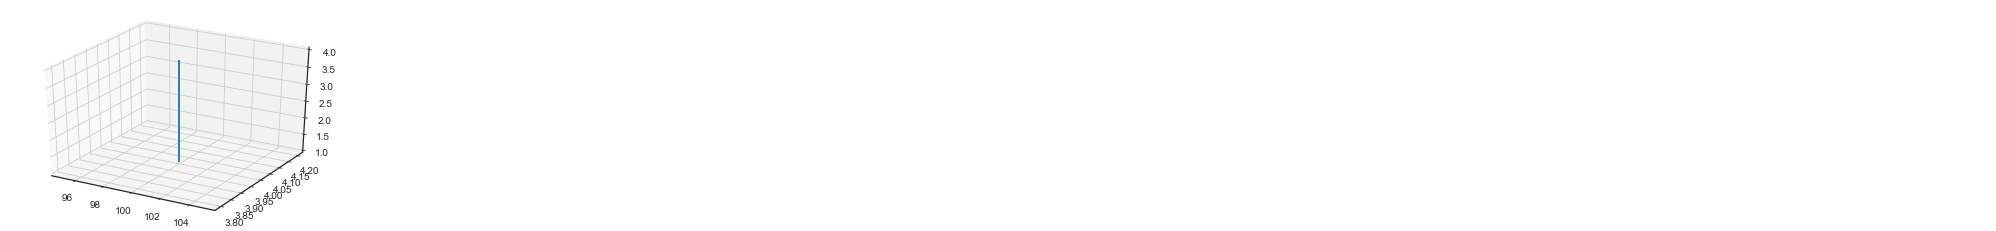

In [174]:
# show 3D wireframe figure
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_wireframe(x_values, y_values, z_values)

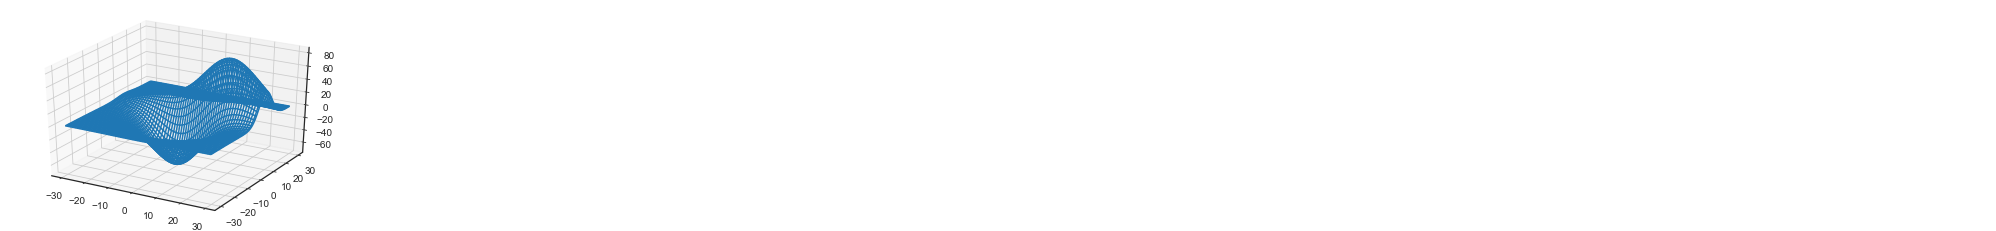

In [168]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x, y, z = axes3d.get_test_data(0.05)

ax.plot_wireframe(x,y,z, rstride=2, cstride=2)

plt.show()

### Task2: Random search CV

In [5]:
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV

mf = stats.randint(1,5)
rs = stats.randint(0,2)
param_dist = {'max_features':mf , 'random_state':rs}


In [6]:
clf = RandomizedSearchCV(RandomForestClassifier() , param_dist , cv = 10 , scoring='accuracy' , return_train_score=True)
clf.fit(X_train , y_train)
clf.cv_results_


NameError: name 'RandomForestClassifier' is not defined

In [7]:
xy_list =clf.cv_results_['params']
axis_x = []
axis_y = []
for xy in xy_list:
    axis_x.append(xy['random_state'])
    axis_y.append(xy['max_features'])
axis_z = clf.cv_results_['mean_test_score']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(axis_x, axis_y, axis_z)

NameError: name 'clf' is not defined

### (Optional) Task3: CVs with SVM

In [8]:
from sklearn.svm import SVC
# Generating test data for avoiding heavy computation
np.random.seed(8)
X = np.random.randn(200,2)
X[:100] = X[:100] +2
X[101:150] = X[101:150] -2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

NameError: name 'train_test_split' is not defined

In [3]:
from sklearn.svm import SVC
# Generating test data for avoiding heavy computation
np.random.seed(8)
X = np.random.randn(200,2)
X[:100] = X[:100] +2
X[101:150] = X[101:150] -2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='|', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)
    
    # Grid search CV here
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy', return_train_score=True)
clf.fit(X, y)
clf.cv_results_

NameError: name 'train_test_split' is not defined

C:\Users\DS\Anaconda3\envs\ds2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


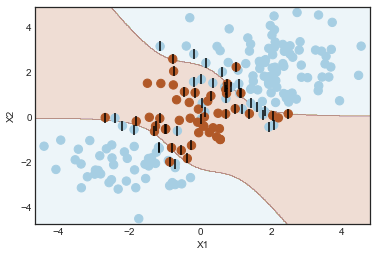

Number of support vectors:  56


In [213]:
svc = SVC(C= 10, kernel='poly',degree=4)
svc.fit(X, y)

plot_svc(svc, X, y)

C:\Users\DS\Anaconda3\envs\ds2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


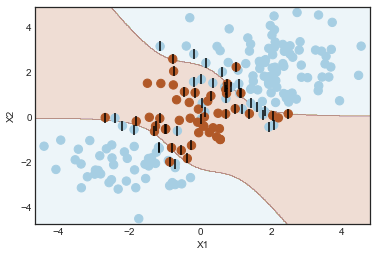

Number of support vectors:  56


{'mean_fit_time': array([0.0013978 , 0.0009973 , 0.00100656, 0.00099378, 0.00079367,
        0.00079777, 0.00079789, 0.00099757, 0.00089772, 0.00099697,
        0.00119476, 0.00109599, 0.00099759, 0.00109725, 0.00120468,
        0.00128849, 0.00109744, 0.00119712, 0.001296  , 0.00129488,
        0.00139639, 0.00149601, 0.00219388, 0.00358825, 0.00369115,
        0.00269213, 0.00408881, 0.0024929 , 0.001895  , 0.00209403,
        0.00159533, 0.00159538, 0.00189431, 0.00169528, 0.00199435,
        0.00199454, 0.0018944 , 0.00169523, 0.00169418, 0.00219483,
        0.0029916 , 0.00259211, 0.00318913, 0.00289414, 0.00209358,
        0.00219371, 0.00249228, 0.00179415, 0.00179546, 0.00249193,
        0.00243802, 0.00249324, 0.0016953 , 0.00179505, 0.00239327,
        0.00229366]),
 'std_fit_time': array([7.97302185e-04, 4.41145337e-04, 1.52195486e-05, 1.13040582e-05,
        3.97041695e-04, 3.98886616e-04, 3.98946004e-04, 3.76218172e-07,
        2.99239577e-04, 6.76033348e-07, 3.98995822e-0

In [214]:
# Grid search CV here

svc = SVC(C= 10, kernel='poly',degree=4)
svc.fit(X, y)

plot_svc(svc, X, y)

tuned_parameters = [{'C': [1,2,3,4,5,6,7,8],'degree':[1,2,3,4,5,6,7]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy', return_train_score=True)
clf.fit(X, y)
clf.cv_results_

C:\Users\DS\Anaconda3\envs\ds2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


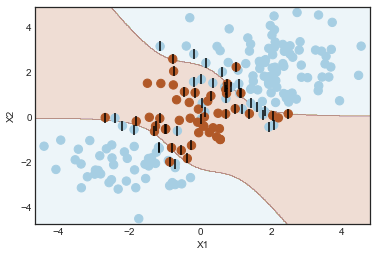

Number of support vectors:  56


C:\Users\DS\Anaconda3\envs\ds2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\DS\Anaconda3\envs\ds2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\DS\Anaconda3\envs\ds2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\DS\Anaconda3\envs\ds2\lib\site-packages\sklearn\svm\

C:\Users\DS\Anaconda3\envs\ds2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\DS\Anaconda3\envs\ds2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\DS\Anaconda3\envs\ds2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\DS\Anaconda3\envs\ds2\lib\site-packages\sklearn\svm\

In [ ]:
# Grid search CV here

svc = SVC(C= 10, kernel='poly',degree=4)
svc.fit(X, y)

plot_svc(svc, X, y)

tuned_parameters = [{'C': [1,2,3,4,5,6,7,8],'degree':[1,2,3,4,5,6,7]}]
clf = GridSearchCV(SVC(kernel='poly'), tuned_parameters, cv=10, scoring='accuracy', return_train_score=True)
clf.fit(X, y)
clf.cv_results_

In [ ]:
from time import time

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

clf_lin = SVC(kernel='linear', C=1.0, gamma=0.1)
clf_rbf = SVC(kernel='rbf', C=1.0, gamma=0.1)
clf_poly = SVC(kernel='poly', C=1.0, gamma=0.1)

start = time()
clf_lin.fit(X_train, y_train)
print("Linear Kernel Non-Normalized Fit Time: {0} s".format(time() - start))
start = time()
clf_rbf.fit(X_train, y_train)
print("RBF Kernel Non-Normalized Fit Time: {0} s".format(time() - start))
start = time()
clf_poly.fit(X_train, y_train)
print("Poly Kernel Non-Normalized Fit Time: {0} s".format(time() - start))

scaler = MinMaxScaler()  # Default behavior is to scale to [0,1]
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y)

start = time()
clf_lin.fit(X_train, y_train)
print("Linear Kernel Normalized Fit Time: {0} s".format(time() - start))
start = time()
clf_rbf.fit(X_train, y_train)
print("RBF Kernel Normalized Fit Time: {0} s".format(time() - start))
start = time()
clf_poly.fit(X_train, y_train)
print("Poly Kernel Normalized Fit Time: {0} s".format(time() - start))

Linear Kernel Non-Normalized Fit Time: 1.0132856369018555 s
RBF Kernel Non-Normalized Fit Time: 0.02294158935546875 s


In [ ]:
# Grid search CV here

In [ ]:
# Randomized search CV here


## Bayesian optimization (with TPE)

* The first time you install the *hyperopt* package with **pip** as following (**Just once!**):
```
(your env) prompt> pip install hyperopt
```

In [208]:
import hyperopt
from hyperopt import hp
from hyperopt import fmin, tpe, rand

In [209]:
# define an objective function
def objective(args):
    case, val = args
    if case == 'case 1':
        return val
    else:
        return val ** 2

In [210]:
# define a search space
space = hp.choice('a',
    [
        ('case 1', 1 + hp.lognormal('c1', 0, 1)),
        ('case 2', hp.uniform('c2', -10, 10))
    ])

In [211]:
# minimize the objective over the space
hpo_algo = rand.suggest #tpe.suggest
best = fmin(objective, space, algo=hpo_algo, max_evals=100)
print ("best x, y:{}".format(hyperopt.space_eval(space, best)))

best x, y:('case 2', -0.07582472690002895)


If you see the result (the values may be different at each trial), installation is complete successfully. 

Before you start to HPO, kindly refer to the [manual](http://hyperopt.github.io/hyperopt/)